In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
# import kagglehub
# samithsachidanandan_human_face_emotions_path = kagglehub.dataset_download('samithsachidanandan/human-face-emotions')
#
# print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

!pip install tensorflow

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import matplotlib.pyplot as plt
import os

  Using cached tensorflow-2.20.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.5 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
Using cached tensorflow-2.20.0-cp312-cp312-macosx_12_0_arm64.whl (200.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.9/676.9 kB 9.9 MB/s  0:00:00
Using cached tensorboard-2.20.0-py3-none-any.whl (5.5 MB)
Using cached tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)


In [3]:
dataset_dir = os.path.join(samithsachidanandan_human_face_emotions_path, 'Data')


In [4]:
IMG_WIDTH=128
IMG_HEIGHT=128
SEED=281
VALIDATION_SPLIT=0.2
BATCH_SIZE=64

train_ds = keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=VALIDATION_SPLIT,
    subset="training",
    seed=SEED,
    image_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

val_ds = keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=VALIDATION_SPLIT,
    subset="validation",
    seed=SEED,
    image_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 59099 files belonging to 5 classes.
Using 47280 files for training.


I0000 00:00:1763896851.084882      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1763896851.085576      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 59099 files belonging to 5 classes.
Using 11819 files for validation.


In [5]:
def plot_training_history(history):
    """Plots training and validation metrics (loss and accuracy) over epochs."""

    # Extract data from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    # --- Plot 1: Loss ---
    plt.subplot(1, 2, 1) # 1 row, 2 columns, plot 1
    plt.plot(epochs_range, loss, label='Training Loss', color='blue')
    plt.plot(epochs_range, val_loss, label='Validation Loss', color='red')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss Value')

    # --- Plot 2: Accuracy ---
    plt.subplot(1, 2, 2) # 1 row, 2 columns, plot 2
    plt.plot(epochs_range, acc, label='Training Accuracy', color='blue')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='red')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')

    plt.tight_layout()
    plt.show()

In [6]:
model = keras.Sequential([
    layers.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,190,789 (8.36 MB)

 Trainable params: 2,190,789 (8.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


I0000 00:00:1763896953.187327      75 service.cc:148] XLA service 0x7aa0140051f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763896953.188091      75 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1763896953.188114      75 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1763896953.484998      75 cuda_dnn.cc:529] Loaded cuDNN version 90300


  7/739 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.2278 - loss: 1.7858

I0000 00:00:1763896958.067531      75 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


739/739 ━━━━━━━━━━━━━━━━━━━━ 135s 58ms/step - accuracy: 0.3502 - loss: 1.4987 - val_accuracy: 0.4826 - val_loss: 1.2428
Epoch 2/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.5118 - loss: 1.2007 - val_accuracy: 0.5574 - val_loss: 1.0925
Epoch 3/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.5764 - loss: 1.0638 - val_accuracy: 0.5918 - val_loss: 1.0175
Epoch 4/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.6205 - loss: 0.9713 - val_accuracy: 0.6330 - val_loss: 0.9462
Epoch 5/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.6474 - loss: 0.9075 - val_accuracy: 0.6374 - val_loss: 0.9188
Epoch 6/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.6686 - loss: 0.8555 - val_accuracy: 0.6575 - val_loss: 0.8869
Epoch 7/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.6933 - loss: 0.7976 - val_accuracy: 0.6843 - val_loss: 0.8267
Epoch 8/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.7188 - loss: 0.7432 - val_accura

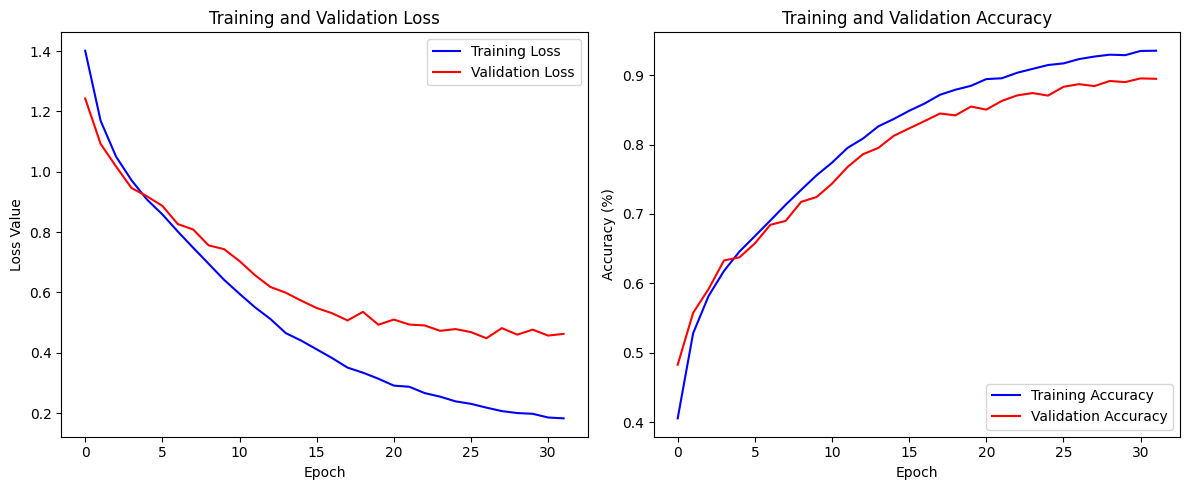

In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stop]
)

plot_training_history(history)